In [1]:
# for basic operations
import numpy as np
import pandas as pd
import os

# for data visualizations
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# Read the data
air = pd.read_csv("Airbnb_Dataset.csv")
hr = pd.read_csv("HRDataset.csv")

In [4]:
air.shape

(311, 16)

In [5]:
air.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,19-10-2018,0.21,6.0,365.0
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,21-05-2019,0.38,2.0,355.0
2,3647.0,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,07-05-2019,4.64,1.0,194.0
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,19-11-2018,0.10,1.0,0.0


In [6]:
air.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
air.dtypes

id                                float64
name                               object
host_id                           float64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

In [8]:
air.isnull().sum()

id                                62
name                              62
host_id                           62
host_name                         62
neighbourhood_group               62
neighbourhood                     62
latitude                          62
longitude                         62
room_type                         62
price                             62
minimum_nights                    62
number_of_reviews                 62
last_review                       69
reviews_per_month                 69
calculated_host_listings_count    62
availability_365                  62
dtype: int64

In [ ]:
air.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [11]:
air.head(3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787.0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
1,Skylit Midtown Castle,2845.0,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0
2,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,1.0,365.0


In [12]:
air.fillna({'reviews_per_month':0}, inplace=True)

In [13]:
air.reviews_per_month.isnull().sum()

0

In [14]:
air.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx', nan],
      dtype=object)

In [15]:
len(air.neighbourhood.unique())

56

In [16]:
air.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', nan],
      dtype=object)

In [17]:
top_host=air.host_id.value_counts().head(10)
top_host

204539.0    5
126607.0    3
256161.0    3
32294.0     3
9744.0      3
22486.0     3
72062.0     3
72014.0     3
190409.0    2
51038.0     2
Name: host_id, dtype: int64

In [18]:
top_host_check=air.calculated_host_listings_count.max()
top_host_check

6.0

In [19]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [20]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,204539.0,5
1,126607.0,3
2,256161.0,3
3,32294.0,3
4,9744.0,3
5,22486.0,3
6,72062.0,3
7,72014.0,3
8,190409.0,2
9,51038.0,2


[Text(0, 0, '9744.0'),
 Text(1, 0, '22486.0'),
 Text(2, 0, '32294.0'),
 Text(3, 0, '51038.0'),
 Text(4, 0, '72014.0'),
 Text(5, 0, '72062.0'),
 Text(6, 0, '126607.0'),
 Text(7, 0, '190409.0'),
 Text(8, 0, '204539.0'),
 Text(9, 0, '256161.0')]

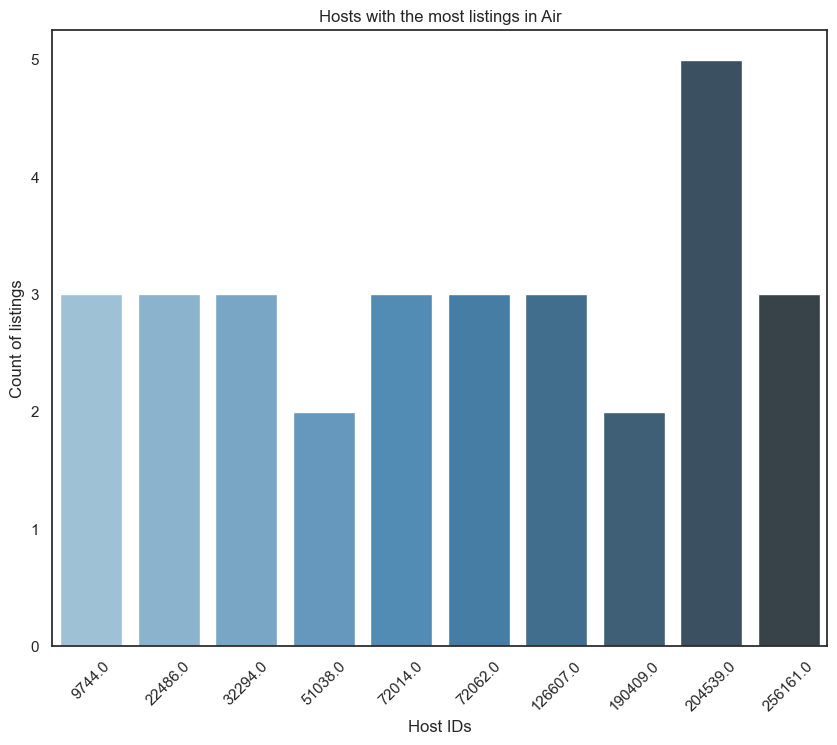

In [22]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in Air')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [23]:
sub_1=air.loc[air['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=air.loc[air['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=air.loc[air['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=air.loc[air['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=air.loc[air['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [24]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]

#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,35.0,40.00,55.0,70.0,40.00
25%,80.0,91.25,88.5,70.0,41.25
50%,120.0,132.50,140.0,70.0,42.50
75%,150.0,195.00,140.0,70.0,43.75
max,800.0,500.00,350.0,70.0,45.00


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

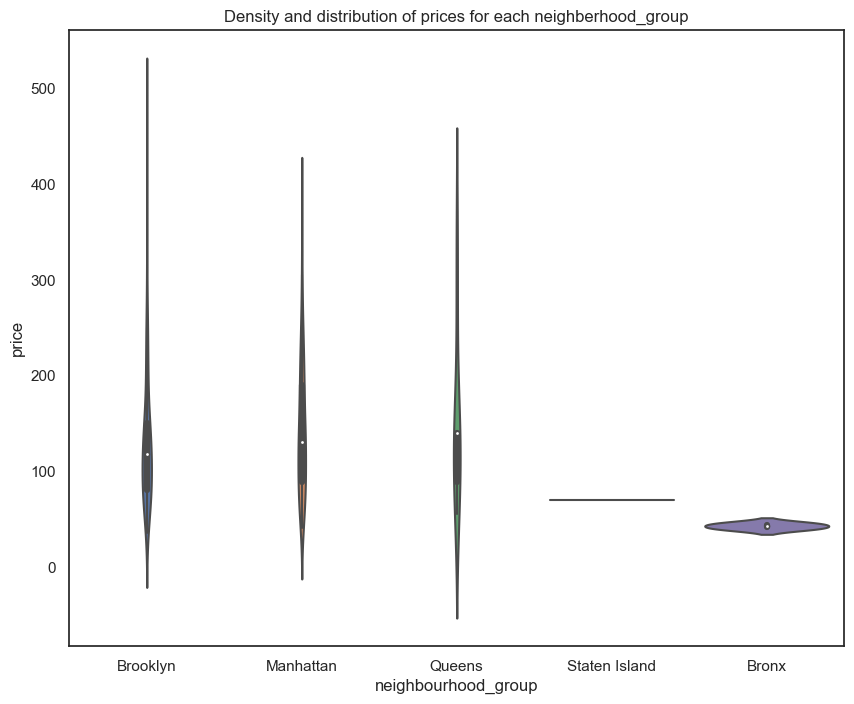

In [25]:
sub_6=air[air.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

In [26]:
air.neighbourhood.value_counts().head(10)

Williamsburg          26
Harlem                22
East Village          20
Bedford-Stuyvesant    17
Hell's Kitchen        12
Clinton Hill           9
Upper West Side        9
Fort Greene            8
West Village           8
Lower East Side        8
Name: neighbourhood, dtype: int64

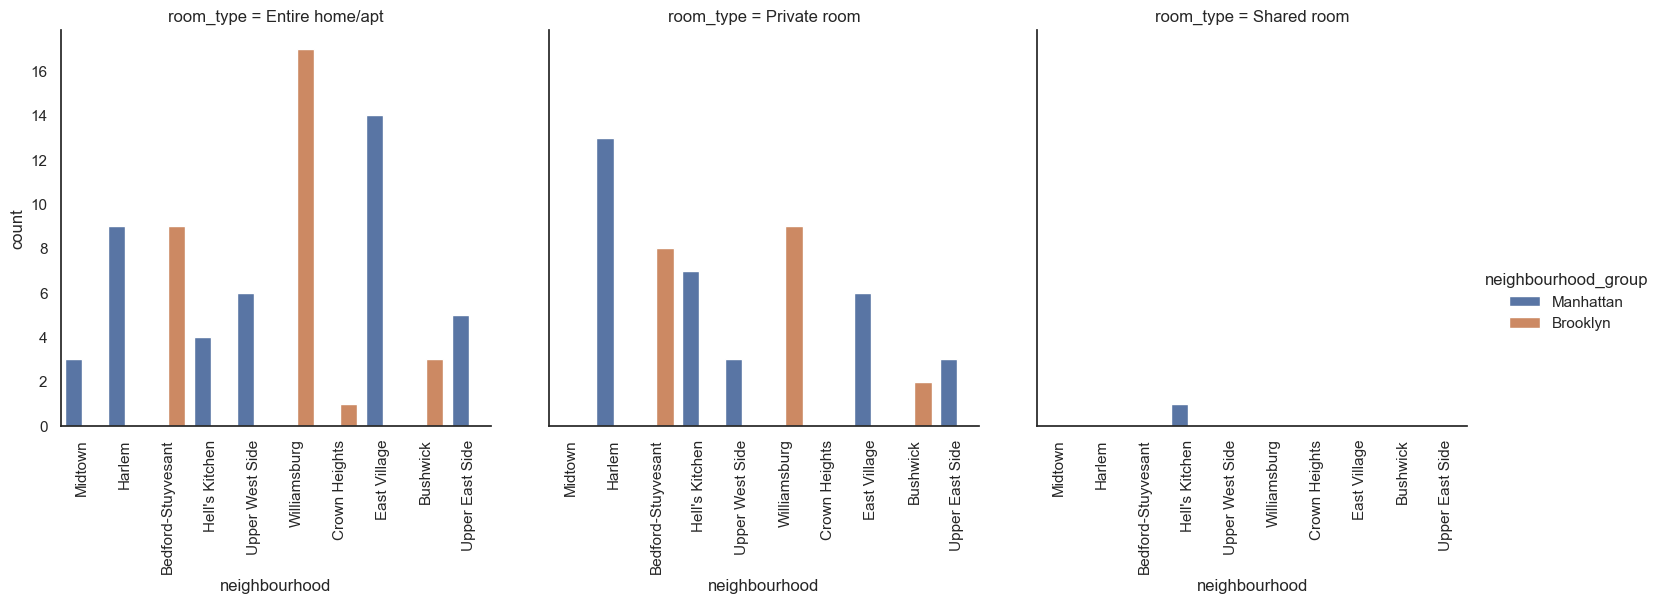

In [27]:
sub_7=air.loc[air['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

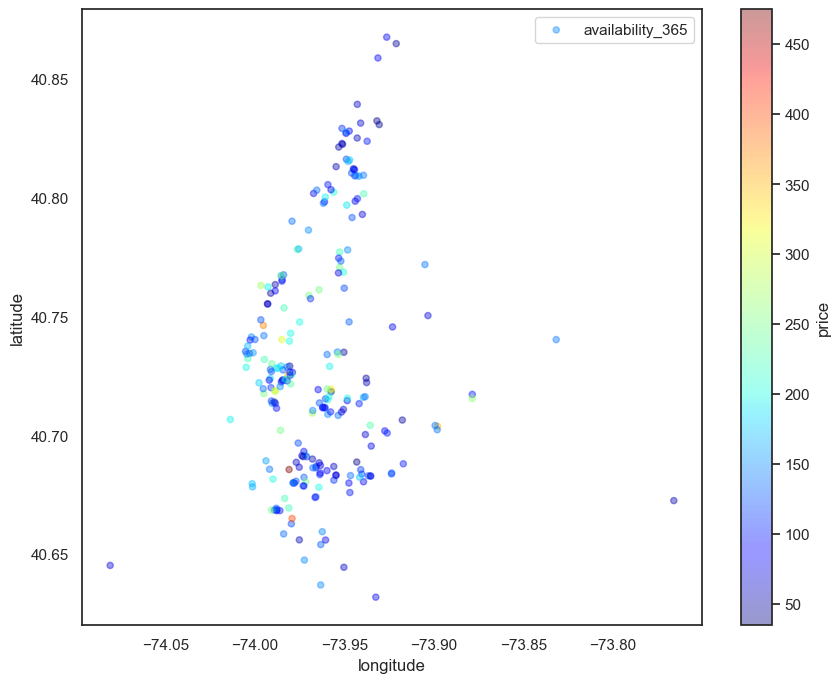

In [28]:
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

In [29]:
top_reviewed_listings=air.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
113,Park Slope Green Guest House,42273.0,Brooklyn,South Slope,40.66853,-73.98912,Entire home/apt,120.0,30.0,467.0,4.22,2.0,192.0
225,PRIVATE Room on Historic Sugar Hill,277379.0,Manhattan,Harlem,40.82510,-73.94287,Private room,60.0,1.0,458.0,4.58,2.0,258.0
7,Large Furnished Room Near B'way,8967.0,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,3.47,1.0,220.0
137,Room with En Suite Bathroom & Deck,137814.0,Brooklyn,Clinton Hill,40.68730,-73.96340,Private room,76.0,2.0,426.0,3.89,3.0,275.0
195,Prime Location in Manhattan,237329.0,Manhattan,Chelsea,40.74859,-73.99671,Private room,123.0,1.0,375.0,3.52,1.0,328.0
202,The Institute—Heart of Williamsburg,10889.0,Brooklyn,Williamsburg,40.71950,-73.95976,Entire home/apt,249.0,2.0,358.0,3.44,2.0,164.0
119,Eveland Private Bed & Living Room w/ Own Entrance,118971.0,Brooklyn,South Slope,40.66831,-73.98604,Private room,99.0,2.0,354.0,3.20,3.0,20.0
67,"Sunny, Modern room in East Village!",64442.0,Manhattan,East Village,40.72649,-73.97904,Private room,80.0,1.0,338.0,4.72,2.0,72.0
104,"Williamsburg—Steps To Subway, Private Bath&Bal...",97219.0,Brooklyn,Williamsburg,40.71332,-73.94177,Private room,101.0,3.0,335.0,3.02,1.0,152.0
110,"Times Square, Safe, Clean and Cozy!",59734.0,Manhattan,Hell's Kitchen,40.75527,-73.99291,Private room,59.0,2.0,334.0,3.00,2.0,279.0


In [30]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 104.6


In [31]:
hr.shape

(311, 37)

In [32]:
hr.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,17-01-2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,24-02-2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,15-05-2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2


In [33]:
hr.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip',
       'DateofHire', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino',
       'RaceDesc', 'DateofHire.1', 'DateofTermination', 'Unnamed: 23',
       'TermReason', 'EmploymentStatus', 'Department', 'ManagerName',
       'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences'],
      dtype='object')

In [34]:
hr.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DateofHire                     object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire.1                   object
DateofTermination              object
Unnamed: 23                   float64
TermReason                     object
EmploymentStatus               object
Department  

In [35]:
hr.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DateofHire                      0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire.1                    0
DateofTermination             207
Unnamed: 23                   311
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSou

In [36]:
hr.head().T

,0,1,2,3,4
Employee_Name,"Adinolfi, Wilson K","Ait Sidi, Karthikeyan","Akinkuolie, Sarah","Alagbe,Trina","Anderson, Carol"
EmpID,10026,10084,10196,10088,10069
MarriedID,0,1,1,1,0
MaritalStatusID,0,1,1,1,2
GenderID,1,1,0,0,0
EmpStatusID,1,5,5,1,5
DeptID,5,3,5,5,5
PerfScoreID,4,3,3,3,3
FromDiversityJobFairID,0,0,0,0,0
Salary,62506,104437,64955,64991,50825


In [37]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [38]:
print('Number of duplicates :', hr.duplicated().sum())

Number of duplicates : 0


In [41]:
hr_active = hr.query('EmploymentStatus=="Active"')

In [43]:
hr_left = hr.query('EmploymentStatus!="Active"')

<Axes: xlabel='Sex', ylabel='count'>

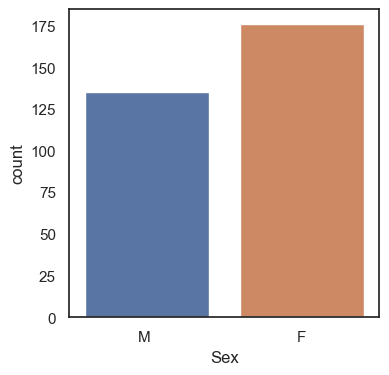

In [51]:
plt.figure(figsize=(4,4))
sns.countplot(hr, x = hr['Sex'])

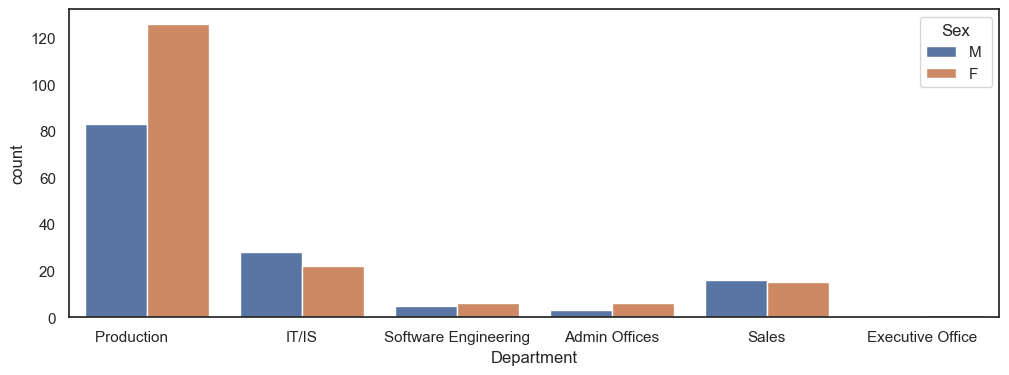

In [53]:
plt.figure(figsize=(12,4))
sns.countplot(hr, x = hr['Department'], hue = hr['Sex']);

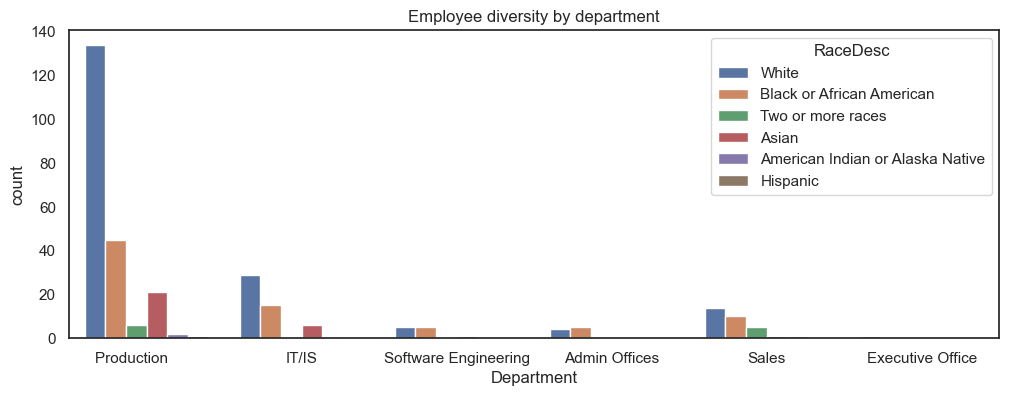

In [55]:
plt.figure(figsize=(12,4))
sns.countplot(hr, x = hr['Department'], hue = hr['RaceDesc'])
plt.title('Employee diversity by department');

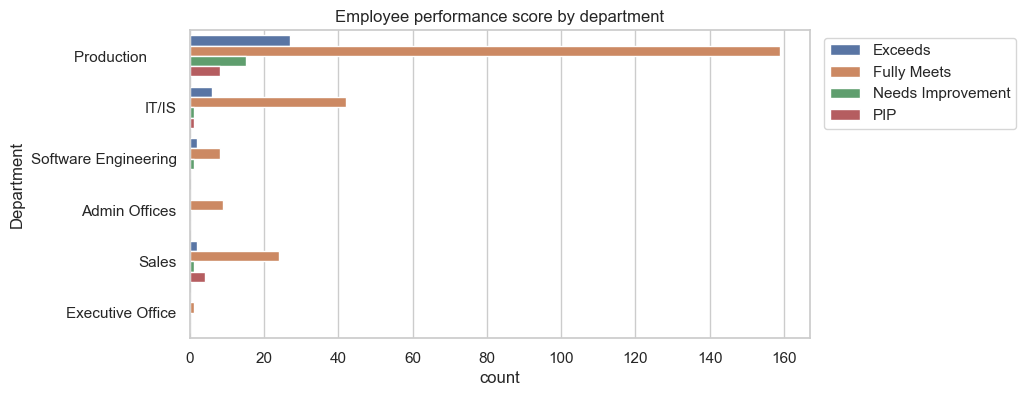

In [56]:
sns.set_style('whitegrid')
plt.figure(figsize = (8,4))
sns.countplot(hr, y = hr['Department'], hue = hr['PerformanceScore'])
plt.title('Employee performance score by department')
plt.legend(bbox_to_anchor=(1.01, 1))

In [57]:
avg_sal = hr.groupby(['Department', 'Sex'])['Salary'].mean().reset_index(name = 'Avg_salary')
avg_sal

,Department,Sex,Avg_salary
0,Admin Offices,F,70926.333333
1,Admin Offices,M,73523.000000
2,Executive Office,F,250000.000000
3,IT/IS,F,94593.000000
4,IT/IS,M,99006.642857
5,Production,F,59620.420635
6,Production,M,60459.253012
7,Sales,F,72016.666667
8,Sales,M,66290.562500
9,Software Engineering,F,96906.166667


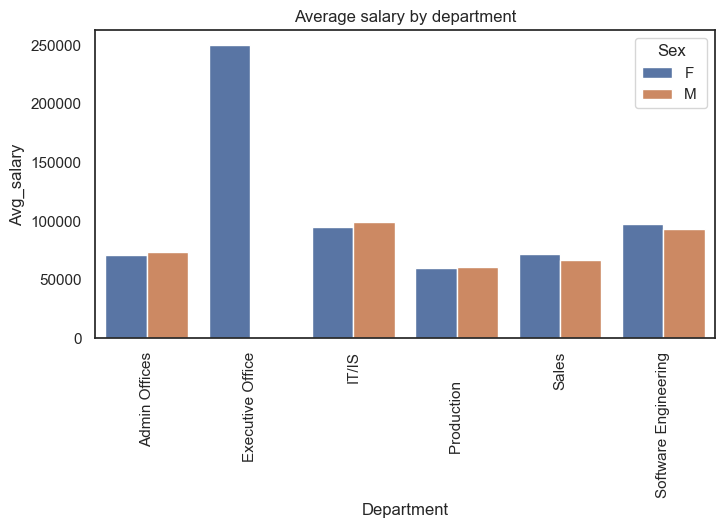

In [58]:
sns.set_style('white')
plt.figure(figsize = (8,4))
sns.barplot(data = avg_sal, x = 'Department', y = 'Avg_salary', hue = 'Sex')
plt.title('Average salary by department')
plt.xticks(rotation = 90);

In [60]:
recruited_from = hr.groupby('RecruitmentSource').size().reset_index(name = 'count').sort_values(by = 'count', ascending = False)

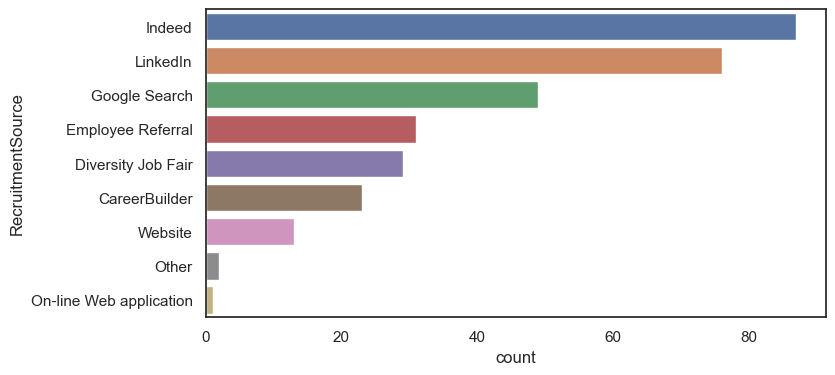

In [61]:
sns.set_style('white')
plt.figure(figsize = (8,4))
sns.barplot(data = recruited_from, y = 'RecruitmentSource', x = 'count');

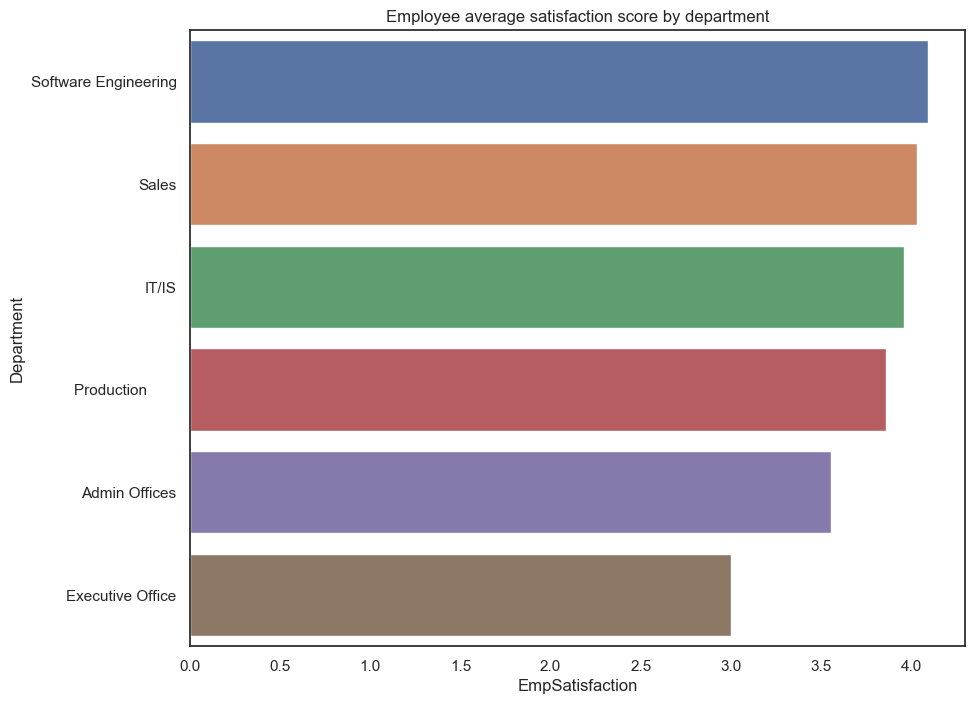

In [62]:
avg_sat = hr.groupby('Department')['EmpSatisfaction'].mean().reset_index().sort_values(by = 'EmpSatisfaction', ascending = False)
sns.barplot(avg_sat, y = 'Department', x = 'EmpSatisfaction')
plt.title('Employee average satisfaction score by department');

In [63]:
df_relation = hr[['MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Sex', 'ManagerID', 
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30',
       'Absences']]

C:\Users\skss\AppData\Local\Temp\ipykernel_10188\1589936302.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_relation.corr().round(2), annot = True, annot_kws={"fontsize":8}, cmap = 'YlGnBu')


<Axes: >

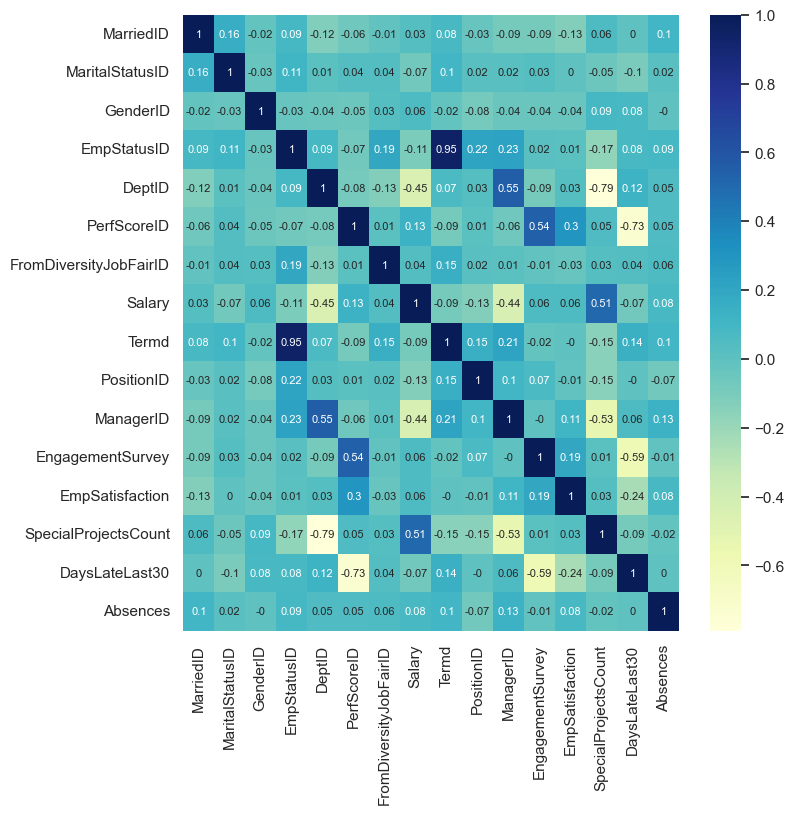

In [64]:
plt.figure(figsize = (8,8))
sns.heatmap(df_relation.corr().round(2), annot = True, annot_kws={"fontsize":8}, cmap = 'YlGnBu')